In [1]:
# task 1
import numpy as np
import matplotlib.pyplot as plt
import cv2

1. Read the image

In [2]:
img = cv2.imread('/content/opencv_transform.jpg')


2. Display the image  


In [3]:
type(img)

numpy.ndarray

3. Extraction of Image size  


In [13]:
# Get image dimensions
height, width, channels = img.shape
print(f"Image Size: Width = {width}, Height = {height}, Channels = {channels}")
# or
img.shape


Image Size: Width = 512, Height = 512, Channels = 3


(512, 512, 3)

4. Calculation image pixels

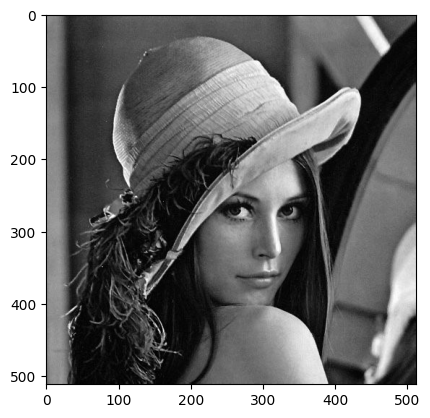

In [14]:
plt.imshow(img)

In [15]:
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")


Total Pixels: 262144


5. Convert RGB to Grayscale image  


(512, 512)

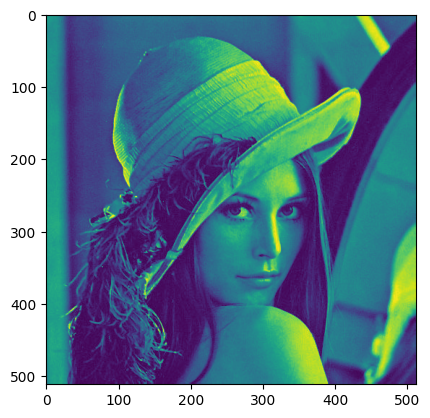

In [20]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)
gray_img.shape


6. Convert RGB to Grayscale image and Binary image by using a threshold.


In [21]:
# Apply threshold to convert grayscale to binary image
threshold_value = 127  # You can adjust this value
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

cv2.imwrite('image_binary.jpg', binary_image)  # Save the binary image


True

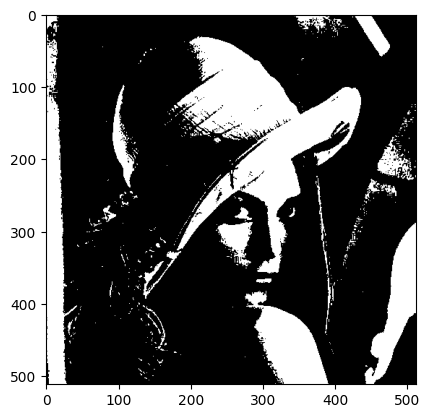

In [22]:
plt.imshow(binary_image, cmap='gray')

i. Also, Count the area of black pixels and size of image

In [23]:
# Count black pixels (where pixel value = 0)
black_pixel_count = np.sum(binary_image == 0)

print(f"Black Pixel Area: {black_pixel_count}")
print(f"Size of Image: {gray_image.shape}")


Black Pixel Area: 199287
Size of Image: (512, 512)


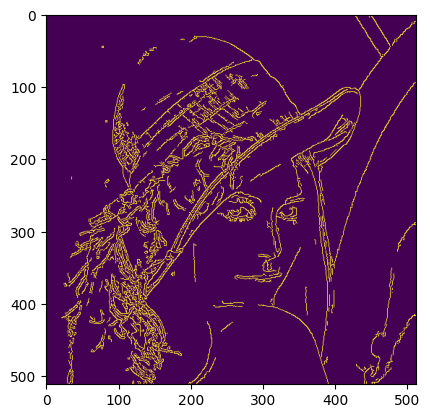

In [25]:
# Edge detection
edges = cv2.Canny(img, 100, 200)
edges_g = cv2.Canny(gray_img, 100, 200)


plt.imshow(edges)

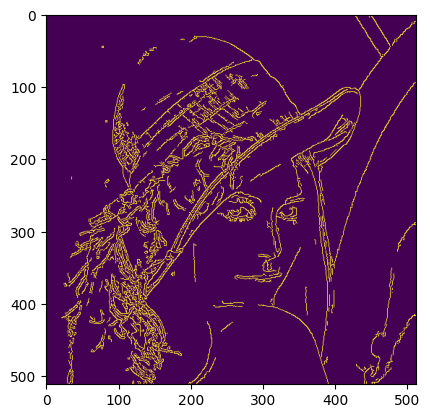

In [26]:
plt.imshow(edges_g)


Task-2:- In this task we will understand and manipulate the properties of an image.

🔹 Sobel Operator
Definition: Computes the gradient (edge strength) in the x & y direction, detecting edges along a preferred axis.
🔹 Why? Detects edges with smoothing effect (reduces noise).

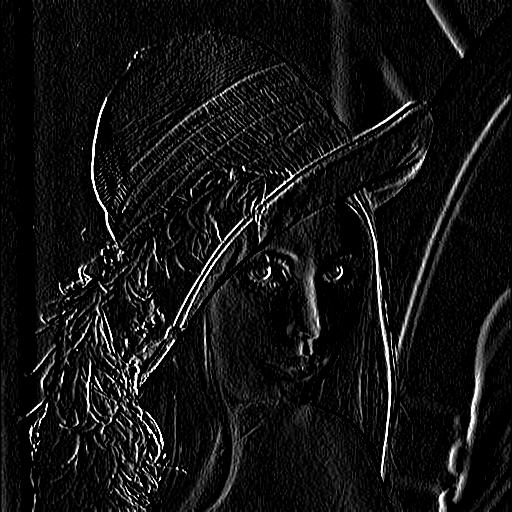

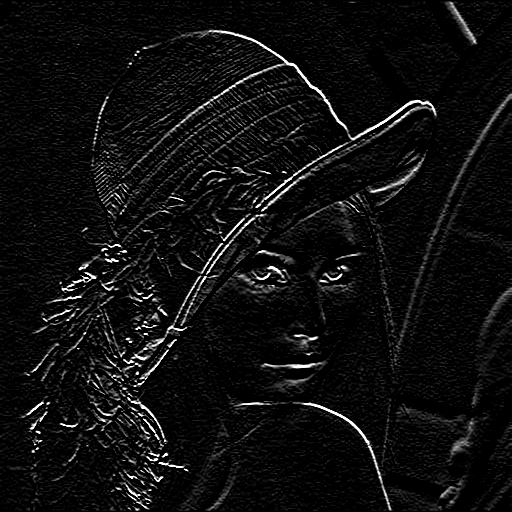

/usr/local/lib/python3.11/dist-packages/google/colab/patches/__init__.py:18: RuntimeWarning: invalid value encountered in cast
  a = a.clip(0, 255).astype('uint8')


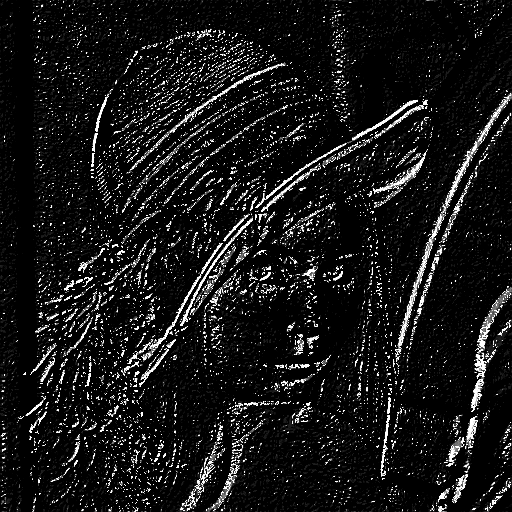

In [28]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Required for Colab

# Read the image in grayscale
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator in both X and Y direction
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)

# Display results
cv2_imshow(sobel_x)
cv2_imshow(sobel_y)
cv2_imshow(sobel_combined)


Definition: Similar to Sobel but simpler, detects edges by computing differences in pixel intensities.
🔹 Why? Faster but more sensitive to noise compared to Sobel.


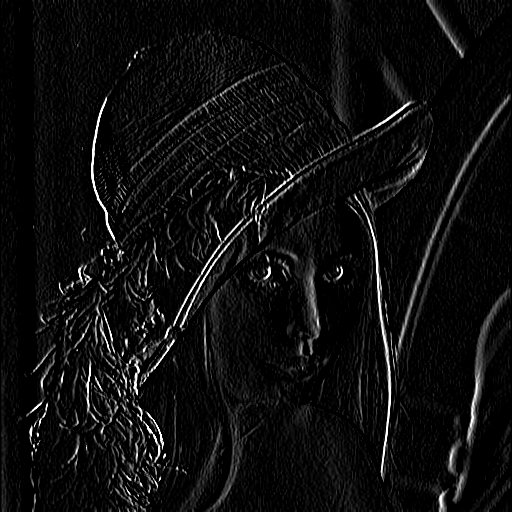

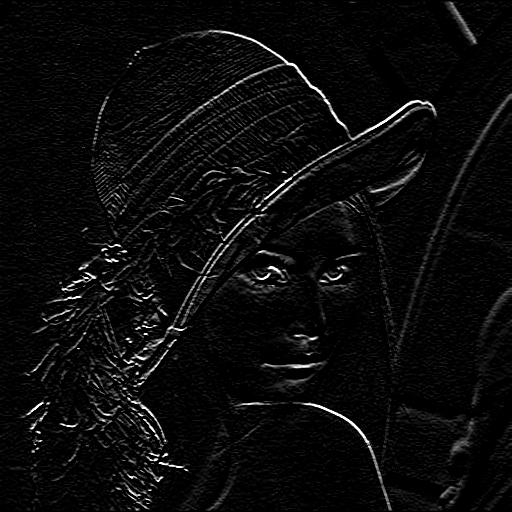

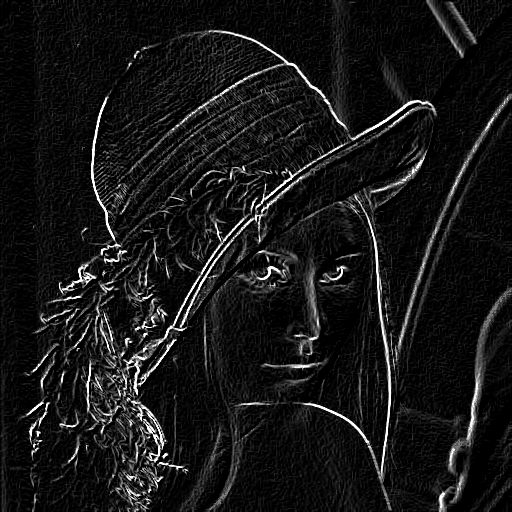

In [30]:
# Define Prewitt kernels
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply Prewitt filter
prewitt_x_image = cv2.filter2D(img, -1, prewitt_x)
prewitt_y_image = cv2.filter2D(img, -1, prewitt_y)
prewitt_combined = cv2.bitwise_or(prewitt_x_image, prewitt_y_image)

# Display results
cv2_imshow(prewitt_x_image)
cv2_imshow(prewitt_y_image)
cv2_imshow(prewitt_combined)


🔹 Roberts Cross Operator
Definition: A simple edge detector that finds edges by applying a 2×2 convolution kernel.
🔹 Why? Fastest edge detector but highly sensitive to noise.

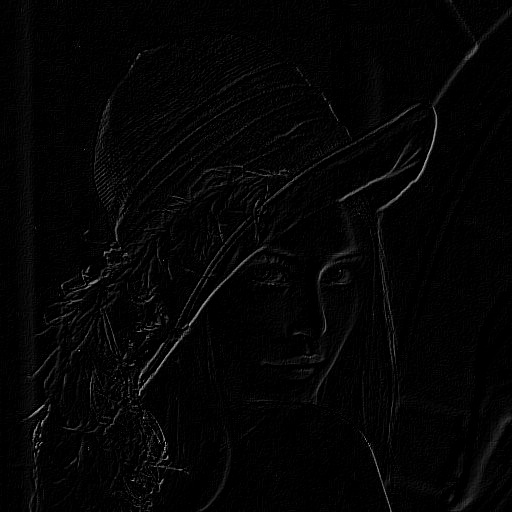

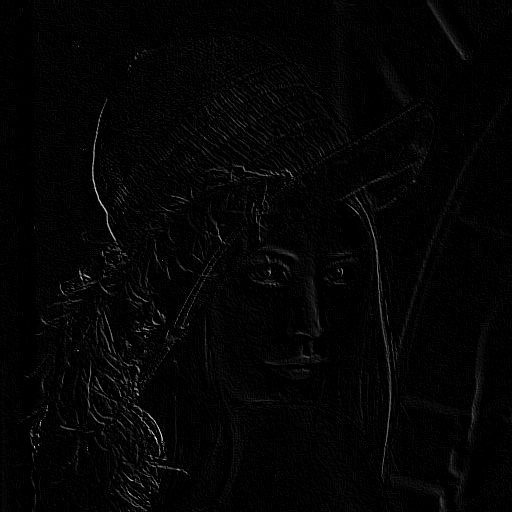

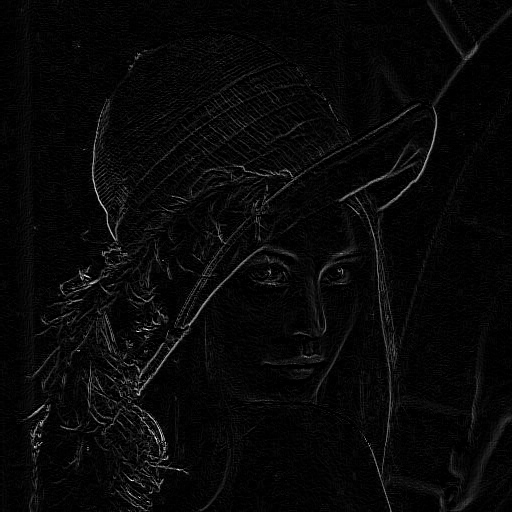

In [34]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Required for Google Colab

# Read the image in grayscale
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Define Roberts cross kernels (2x2 filters)
roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

# Apply Roberts filter using cv2.filter2D
roberts_x_image = cv2.filter2D(img, -1, roberts_x)
roberts_y_image = cv2.filter2D(img, -1, roberts_y)
roberts_combined = cv2.bitwise_or(roberts_x_image, roberts_y_image)

# Display results
cv2_imshow(roberts_x_image)  # Horizontal edges
cv2_imshow(roberts_y_image)  # Vertical edges
cv2_imshow(roberts_combined)  # Combined edges


🔹 Canny Edge Detection
Definition: A multi-stage edge detection algorithm that detects strong and weak edges using gradients & thresholding.
🔹 Why? Most effective & widely used edge detector.

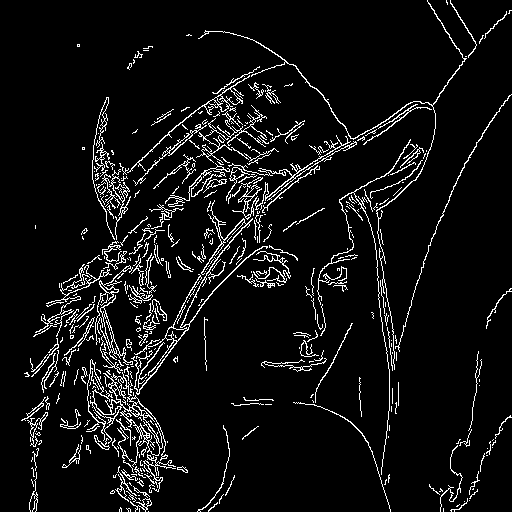

In [35]:
# Apply Canny edge detection
canny_edges = cv2.Canny(img, 100, 200)

# Display results
cv2_imshow(canny_edges)


2. Perform Image Segmentation on an Image using Various Techniques

🔹 Global Thresholding for Segmentation
Definition: Assigns pixels to foreground or background based on a single threshold value.
🔹 Why? Fast and simple but not effective for complex images.

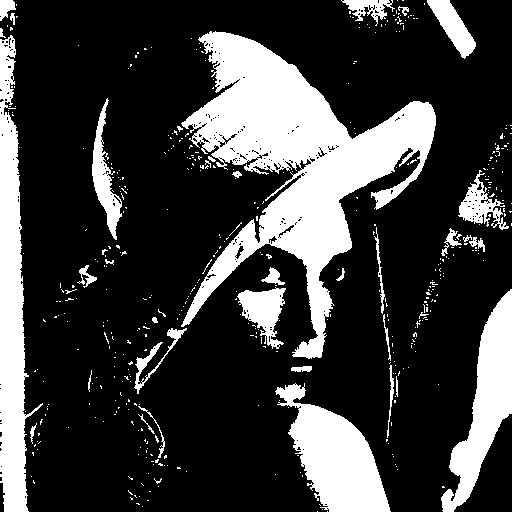

In [36]:
# Apply global thresholding
_, global_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Display result
cv2_imshow(global_thresh)


🔹 Adaptive Thresholding
Definition: Computes a different threshold for each region of the image based on local pixel intensities.
🔹 Why? Works better for images with varying lighting conditions.

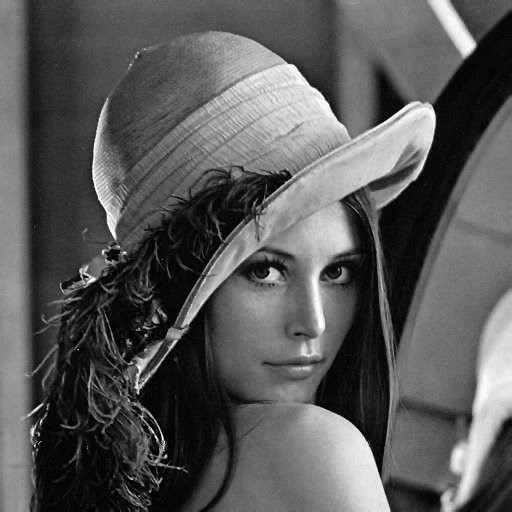

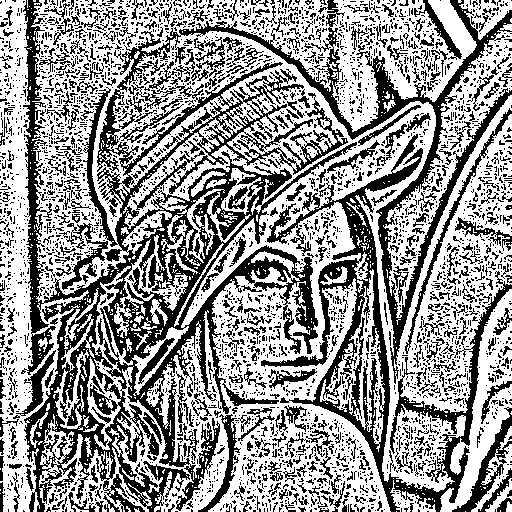

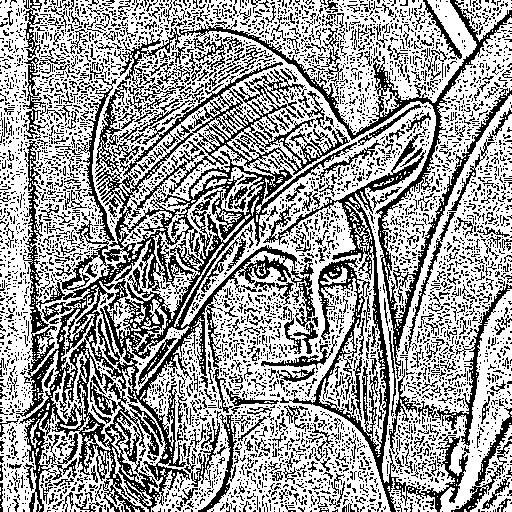

In [39]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Required for Google Colab

# Read the image in grayscale
image = cv2.imread('/content/opencv_transform.jpg', cv2.IMREAD_GRAYSCALE)

# ✅ Ensure image is converted to CV_8UC1 format
if image is None:
    print("Error: Could not read the image file.")
else:
    # Apply Adaptive Thresholding (Mean and Gaussian)
    adaptive_thresh_mean = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
    )
    adaptive_thresh_gaussian = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # Display results
    cv2_imshow(image)  # Original grayscale image
    cv2_imshow(adaptive_thresh_mean)  # Mean Adaptive Thresholding
    cv2_imshow(adaptive_thresh_gaussian)  # Gaussian Adaptive Thresholding


🔹 Edge-Based Segmentation (Using Canny Edge Detection)
Definition: Uses edge detection to identify object boundaries and segment the image.
🔹 Why? Works well for high-contrast images.

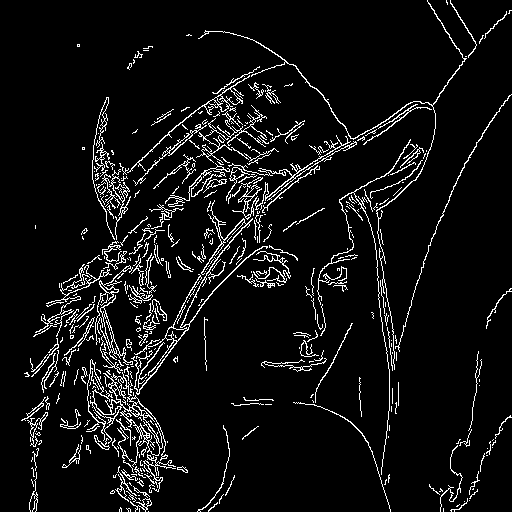

In [40]:
# Use the previously detected Canny edges for segmentation
cv2_imshow(canny_edges)


🔹 Watershed Algorithm (Final Segmentation)
Definition: A powerful region-based segmentation technique that treats an image like a topographic surface and separates objects based on boundaries (watershed lines).
🔹 Why? Identifies object boundaries precisely and is used in image segmentation.
region based segmentation


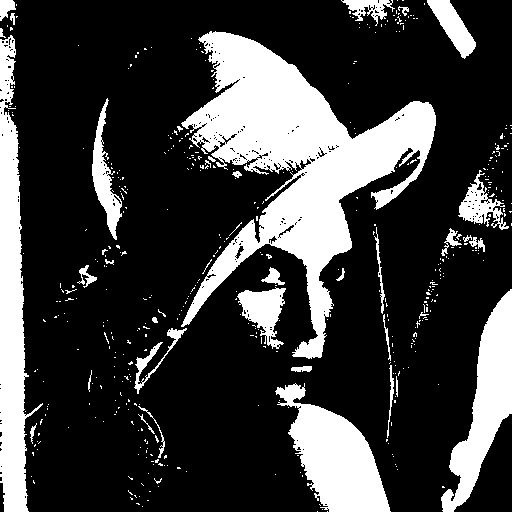

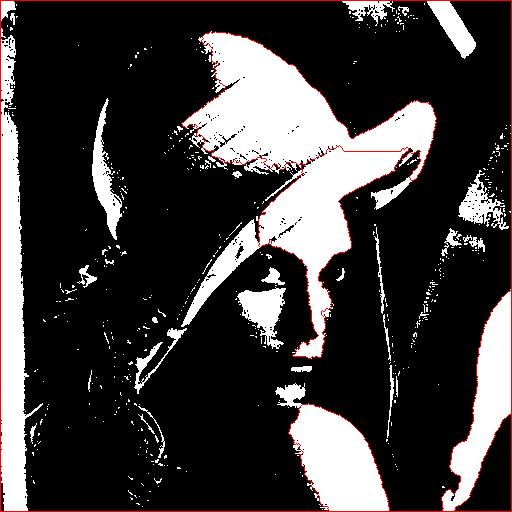

In [44]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Required for Google Colab

# Load the image
image = cv2.imread("/content/image_binary.jpg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ✅ Apply Otsu's thresholding (fixes the error)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground area (distance transform)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that the background is 1 instead of 0
markers = markers + 1

# Mark the unknown region with zero
markers[unknown == 255] = 0

# ✅ Apply Watershed Algorithm
cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]  # Mark boundaries in red

# Display results
cv2_imshow(binary)  # Binary image
cv2_imshow(image)  # Final segmented image
